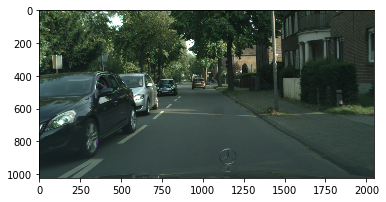

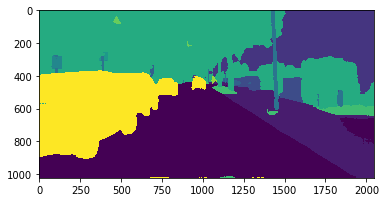

In [4]:
%matplotlib inline

import sys, os
sys.path.append("/home/daniil/repos/pytorch-segmentation-detection/")
sys.path.insert(0, '/home/daniil/repos/pytorch-segmentation-detection/vision/')

# Use second GPU -pytorch-segmentation-detection- change if you want to use a first one
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

from PIL import Image
from matplotlib import pyplot as plt

import torch
from torchvision import transforms
from torch.autograd import Variable
import pytorch_segmentation_detection.models.resnet_dilated as resnet_dilated

import numpy as np

img_path = '/home/daniil/projects/datasets/leftImg8bit/val/munster/munster_000163_000019_leftImg8bit.png'

valid_transform = transforms.Compose(
                [
                     transforms.ToTensor(),
                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])

img_not_preprocessed = Image.open(img_path).convert('RGB')

img = valid_transform(img_not_preprocessed)

img = img.unsqueeze(0)

img = Variable(img.cuda())

fcn = resnet_dilated.Resnet34_8s(num_classes=19)
fcn.load_state_dict(torch.load('resnet_34_8s_cityscapes_best.pth'))
fcn.cuda()
fcn.eval()

res = fcn(img)

_, tmp = res.squeeze(0).max(0)

segmentation = tmp.data.cpu().numpy().squeeze()

plt.imshow(img_not_preprocessed)
plt.show()

plt.imshow(segmentation)
plt.show()